In [159]:
#!/usr/bin/env python

import math
import sys
import cmath
import numpy as np

def root_print_header(algorithm, accuracy):
    sys.stdout.write("\n ROOT FINDING using " + algorithm +
                     "\n Requested accuracy = " +repr(accuracy) +
                     "\n Step     Guess For Root          Step Size      " +
                     "     Function Value" +
                     "\n ----  --------------------  --------------------" +
                     "  --------------------" + "\n")

def root_print_step(step, x, dx, f_of_x):
    sys.stdout.write(repr(step).rjust(5))
    for val in [x, dx, f_of_x]:
        sys.stdout.write("  " + repr(val).ljust(20))
    sys.stdout.write("\n")

def root_max_steps(algorithm, max_steps):
    raise Exception(" " + algorithm + ": maximum number of steps " +
                    repr(max_steps) + " exceeded\n")

def root_simple(f, x, dx, accuracy=1.0e-6, max_steps=1000, root_debug=False):
    """Return root of f(x) given guess x and step dx with specified accuracy.
    Step must be in direction of root: dx must have same sign as (root - x).
    """
    f0 = f(x)
    fx = f0
    step = 0
    iterations = []
    if root_debug:
        root_print_header("Simple Search with Step Halving", accuracy)
        root_print_step(step, x, dx, f0)
        iterations.append([x,f0])
    while abs(dx) > abs(accuracy) and f0 != 0.0:
        x += dx
        fx = f(x)
        if f0 * fx < 0.0:   # stepped past root
            x -= dx         # step back
            dx /= 2.0       # use smaller step
        step += 1
        if step > max_steps:
            root_max_steps("root_simple", max_steps)
        if root_debug:
            root_print_step(step, x, dx, fx)
            iterations.append([x,fx])
    return x,np.array(iterations)

def root_bisection(f, x1, x2, accuracy=1.0e-6, max_steps=1000, root_debug=False):
    """Return root of f(x) in bracketed by x1, x2 with specified accuracy.
    Assumes that f(x) changes sign once in the bracketed interval.
    Uses bisection root-finding algorithm.
    """
    iterations = []
    f1 = f(x1)
    f2 = f(x2)
    if f1 * f2 > 0.0:
        raise Exception("f(x1) * f(x2) > 0.0")
    x_mid = (x1 + x2) / 2.0
    f_mid = f(x_mid)
    dx = x2 - x1
    step = 0
    if root_debug:
        iterations = []
        root_print_header("Bisection Search", accuracy)
        root_print_step(step, x_mid, dx, f_mid)
        iterations.append([x_mid,f_mid])
    while abs(dx) > accuracy:
        if f_mid == 0.0:
            dx = 0.0
        else:
            if f1 * f_mid > 0:
                x1 = x_mid
                f1 = f_mid
            else:
                x2 = x_mid
                f2 = f_mid
            x_mid = (x1 + x2) / 2.0
            f_mid = f(x_mid)
            dx = x2 - x1
        step += 1
        if step > max_steps:
            warning = "Too many steps (" + repr(step) + ") in root_bisection"
            raise Exception(warning)
        if root_debug:
            root_print_step(step, x_mid, dx, f_mid)
            iterations.append([x_mid,f_mid])
    return x_mid,np.array(iterations)

def root_secant(f, x0, x1, accuracy=1.0e-6, max_steps=20,root_debug=False):
    """Return root of f(x) given guesses x0 and x1 with specified accuracy.
    Uses secant root-finding algorithm.
    """
    iterations=[]
    f0 = f(x0)
    dx = x1 - x0
    step = 0
    if root_debug:
        root_print_header("Secant Search", accuracy)
        root_print_step(step, x0, dx, f0)
        iterations.append([x0,f0])
    if f0 == 0:
        return x0
    while abs(dx) > abs(accuracy):
        f1 = f(x1)
        if f1 == 0:
            return x1
        if f1 == f0:
            raise Exception("Secant horizontal f(x0) = f(x1) algorithm fails")
        dx *= - f1 / (f1 - f0)
        x0 = x1
        f0 = f1
        x1 += dx
        step += 1
        if step > max_steps:
            root_max_steps("root_secant", max_steps)
        if root_debug:
            root_print_step(step, x1, dx, f1)
            iterations.append([x1,f1])
    return x1,np.array(iterations)

def root_tangent(f, fp, x0, accuracy=1.0e-6, max_steps=20, root_debug=False):
    """Return root of f(x) with derivative fp = df(x)/dx
    given initial guess x0, with specified accuracy.
    Uses Newton-Raphson (tangent) root-finding algorithm.
    """
    iterations = []
    f0 = f(x0)
    fp0 = fp(x0)
    if fp0 == 0.0:
        raise Exception(" root_tangent df/dx = 0 algorithm fails")
    dx = - f0 / fp0
    step = 0
    if root_debug:
        root_print_header("Tangent Search", accuracy)
        root_print_step(step, x0, dx, f0)
        iterations.append([x0,f0])
    if f0 == 0.0:
        return x0
    while True:
        fp0 = fp(x0)
        if fp0 == 0.0:
            raise Exception(" root_tangent df/dx = 0 algorithm fails")
        dx = - f0 / fp0
        x0 += dx
        f0 = f(x0)
        if abs(dx) <= accuracy or f0 == 0.0:
            return x0
        step += 1
        if step > max_steps:
            root_max_steps("root_tangent", max_steps)
        if root_debug:
            root_print_step(step, x0, dx, f0)
            iterations.append([x0,f0])
    return x0

In [160]:
%%writefile calculus.py

Overwriting calculus.py



 ROOT FINDING using Simple Search with Step Halving
 Requested accuracy = 1e-06
 Step     Guess For Root          Step Size           Function Value
 ----  --------------------  --------------------  --------------------
    0  1.5708063267948966    0.2                   -99999.99999662387  
    1  1.7708063267948966    0.2                   -4.932901527914654  
    2  1.9708063267948965    0.2                   -2.3651564788278026 
    3  2.1708063267948967    0.2                   -1.461664581986146  
    4  2.370806326794897     0.2                   -0.9711951682611982 
    5  2.570806326794897     0.2                   -0.6420784931957363 
    6  2.7708063267948972    0.2                   -0.3887680579174224 
    7  2.9708063267948974    0.2                   -0.17246642836735   
    8  2.9708063267948974    0.1                   0.02922198673626651 
    9  3.0708063267948975    0.1                   -0.07090479402062694
   10  3.0708063267948975    0.05                  0.02922

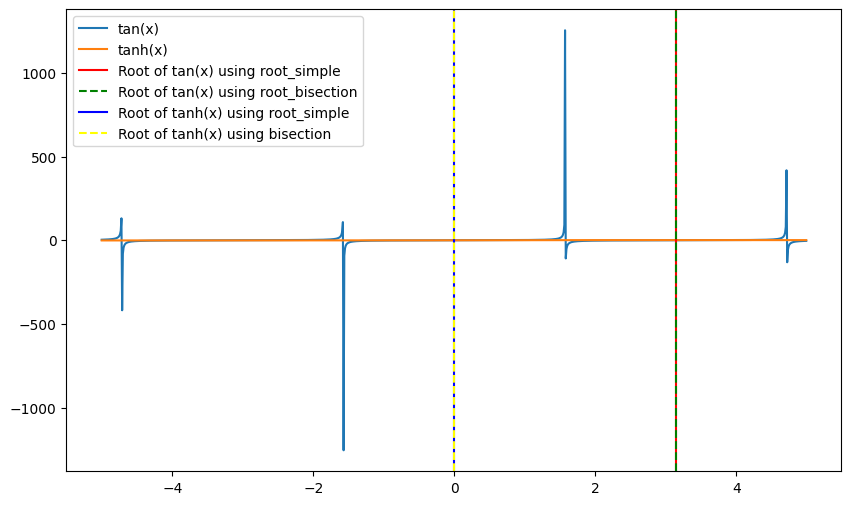

In [161]:
"""
This code will import 2 functions from calculus module.
1- def the main fuctions tan(x) and tanh(x)
2-calculate the roots based on the first guess in case of root_simple
and x0 and x1 for root_bisection
3- calculate accuracy and number of steps
4- make a plot of the roots of tan(x) and tanh(x) using root_simple and root_bisection
"""
import calculus
import matplotlib.pyplot as plt
# Define the functions to be evaluated
def f_tan(x):
    return np.tan(x)
def f_tanh(x):
    return np.tanh(x)
# Define the starting points and x0 and x1 for bisction
x0_tan_simple = (math.pi /2 + 0.00001)
x0_tan_bisection = (math.pi /2 + 0.00001)
x1_tan_bisection = (3*math.pi /2 - 0.00001)
x0_tanh_simple = -0.5
x0_tanh_bisection = -1
x1_tanh_bisection= 0
# Calculate the roots using root_simple and root_bisection
# for root_debug=True it will print the steps
root_tan_simple, steps_tan_simple = root_simple(f_tan,
                                                x0_tan_simple, 0.2 ,
                                                accuracy=1.0e-6,
                                                root_debug=True,
                                                max_steps=1000)
root_tan_bisection, steps_tan_bisection = root_bisection(f_tan,
                                                         x0_tan_bisection,
                                                         x1_tan_bisection,
                                                         accuracy=1.0e-6,
                                                         root_debug=True,
                                                         max_steps=1000)
root_tanh_simple, steps_tanh_simple = root_simple(f_tanh,
                                                  x0_tanh_simple,
                                                  0.1, accuracy=1.0e-6,
                                                  root_debug=True,
                                                  max_steps=1000)
root_tanh_bisection, steps_tanh_bisection = root_bisection(f_tanh,
                                                           x0_tanh_bisection,
                                                           x1_tanh_bisection,
                                                           accuracy=1.0e-6,
                                                           root_debug=True,
                                                           max_steps=1000)
# Calculate the accuracy
#tan(x)
accuracy_tan_simple = abs(root_tan_simple - 0.0)
accuracy_tan_bisection = abs(root_tan_bisection - 0.0)
#tanh(x)
accuracy_tanh_simple = abs(root_tanh_simple - 0.0)
accuracy_tanh_bisection = abs(root_tanh_bisection - 0.0)
# Print the results for tan(x)
print("----------------Results of tan(x)----------------")
print("---------root_simple---------")
print("Root of tan(x) using root_simple:", root_tan_simple)
print("Accuracy of tan(x) root using root_simple:", accuracy_tan_simple)
print("Steps taken for tan(x) root using root_simple:", len(steps_tan_simple))
print("---------root_bisection---------")
print("Root of tan(x) using root_bisection:", root_tan_bisection)
print("Accuracy of tan(x) root using root_bisection:", accuracy_tan_bisection)
print("Steps taken for tan(x) root using root_bisection:", len(steps_tan_bisection))
# Print the results for tanh(x)
print("----------------Results of tanh(x)----------------")
print("---------root_simple---------")
print("Root of tanh(x) using root_simple:", root_tanh_simple)
print("Accuracy of tanh(x) root using root_simple:", accuracy_tanh_simple)
print("Steps taken for tanh(x) root using root_simple:", len(steps_tanh_simple))
print("---------root_bisection---------")
print("Root of tanh(x) using root_bisection:", root_tanh_bisection)
print("Accuracy of tanh(x) root using root_bisection:", accuracy_tanh_bisection)
print("Steps taken for tanh(x) root using root_bisection:", len(steps_tanh_bisection))
# Plot the functions and their roots
x_vals = np.arange(-5.0, 5.0, 0.01)
y_tan = f_tan(x_vals)
y_tanh = f_tanh(x_vals)
#Plot of the results
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_tan, label='tan(x)')
plt.plot(x_vals, y_tanh, label='tanh(x)')
# plot lines that illustrates the root values
#tan(x)
plt.axvline(x=root_tan_simple, color='red', linestyle='-', label='Root of tan(x) using root_simple')
plt.axvline(x=root_tan_bisection, color='green', linestyle='--', label='Root of tan(x) using root_bisection')
#tanh(x)
plt.axvline(x=root_tanh_simple, color='blue', linestyle='-', label='Root of tanh(x) using root_simple')
plt.axvline(x=root_tanh_bisection, color='yellow', linestyle='--', label='Root of tanh(x) using bisection')
plt.legend()
plt.show()


In [162]:
import calculus
import re
def accuracy_digits(number):
  """Counts the number of digits in a number."""
  number = str(number)
  # If the number starts with a decimal point, add a leading zero.
  if number[0] == ".":
    number = "0" + number
  # If the number ends with an exponent, count the exponent as a significant figure.
  if "e" in number or "E" in number:
    exponent = re.findall(r"[+\-]?\d+", number[-4:])[0]
    number = number[:-4]
  else:
    exponent = 0
  digits = 0
  for char in number:
    if char.isdigit():
      digits += 1
  # Return the number of digits.
  return digits

##Tan_accuracy_digits
acc_tan_bisection= accuracy_digits(accuracy_tan_bisection)
acc_tan_simple= accuracy_digits(accuracy_tan_simple)
##Tanh accuracy_digits
acc_tanh_bisection= accuracy_digits(accuracy_tanh_bisection)
acc_tanh_simple= accuracy_digits(accuracy_tanh_simple)
  #results comparing
print("---------for tan(x)---------- \n ","Accuracy \n",
      " the accuracy of root_simple is ",
      acc_tan_simple ,
      "\n","the accuracy of root_bisection is ", acc_tan_bisection )
print("Steps \n","the number of steps for root_simple is ",
      len(steps_tan_simple), "\n",
      "the number of steps for the root_bisection is",
      len(steps_tan_bisection))
print("---------for tan(x)---------- \n ","Accuracy \n",
      " the accuracy of root_simple is ",
      acc_tanh_simple , "\n","the accuracy of root_bisection is ",
      acc_tanh_bisection  )
print("Steps \n","the number of steps for root_simple is ",
      len(steps_tanh_simple), "\n",
      "the number of steps for the root_bisection is",
      len(steps_tanh_bisection))

---------for tan(x)---------- 
  Accuracy 
  the accuracy of root_simple is  17 
 the accuracy of root_bisection is  17
Steps 
 the number of steps for root_simple is  36 
 the number of steps for the root_bisection is 23
---------for tan(x)---------- 
  Accuracy 
  the accuracy of root_simple is  17 
 the accuracy of root_bisection is  15
Steps 
 the number of steps for root_simple is  23 
 the number of steps for the root_bisection is 21
